In [120]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv("IEA Global EV Data 2024.csv")
df.dtypes

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

C:\Users\kenny\AppData\Local\Temp\ipykernel_12192\1276622457.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_2010 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2010]
C:\Users\kenny\AppData\Local\Temp\ipykernel_12192\1276622457.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_2010 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2010]
C:\Users\kenny\AppData\Local\Temp\ipykernel_12192\1276622457.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_2023 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2023]
C:\Users\kenny\AppData\Local\Temp\ipykernel_12192\1276622457.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_2023 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2023]


14375342.0


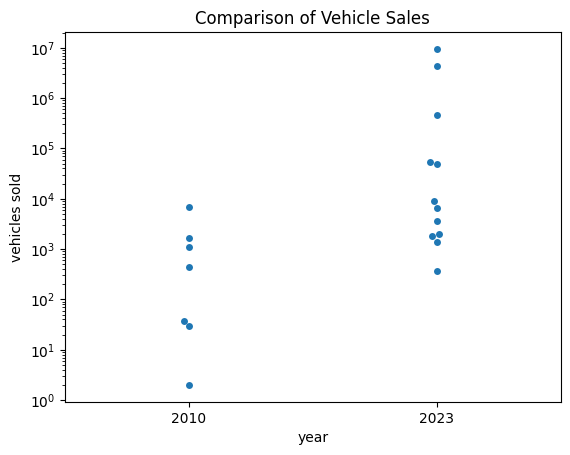

In [122]:
# 1. How many electric vehicles have been sold in the 
#    World in 2023 compared to 2010?
sort_by_world = df[df.region == "World"]
specification = [sort_by_world.category == "Historical", sort_by_world.parameter == "EV sales"]
world_2010 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2010]
world_2023 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2023]
sale_difference = world_2023.value.sum() - world_2010.value.sum()
print(sale_difference)
combined = pd.concat([world_2010, world_2023])
seaborn.swarmplot(x=combined.year,y=combined.value)
plt.yscale('log')
plt.ylabel("vehicles sold")
plt.title("Comparison of Vehicle Sales")
# make sure to save b4 showing otherwise saves blank img
plt.savefig("Visualizations/Question 1 Visualization.png")
plt.show()

C:\Users\kenny\AppData\Local\Temp\ipykernel_12192\2386604134.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sort_by_historical_sales = df[df.category == "Historical"][df.parameter == "EV sales"]


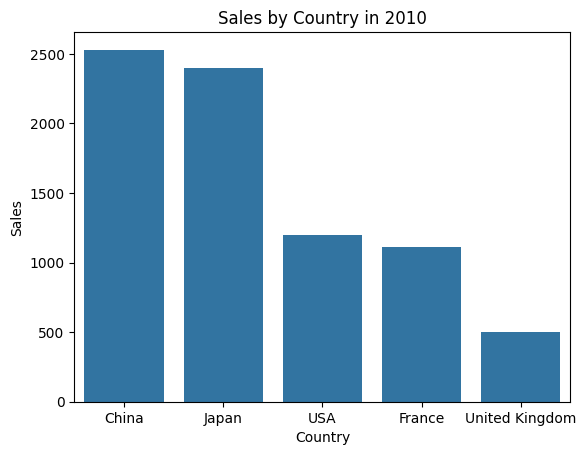

In [123]:
# 2. Who were the top 5 countries that sold EVs in 2010?
countries = df.region.unique()
sort_by_historical_sales = df[df.category == "Historical"][df.parameter == "EV sales"]
sort_by_historical_sales
historical_sales_2010 = sort_by_historical_sales[sort_by_historical_sales.year == 2010]
country_sales = {}
for country in countries:
    country_sales[country] = 0
for index, row in historical_sales_2010.iterrows():
    if (row.region != "World" and row.region != "Europe" and row.region != "EU27"):
        country_sales[row.region] = country_sales[row.region] + row.value
result = sorted(country_sales.items(), key=lambda item: item[1], reverse=True)
sum_country_sales = pd.DataFrame(result,columns=["Country","Sales"])
top_5_countries = sum_country_sales.nlargest(5,"Sales")
seaborn.barplot(x=top_5_countries.Country,y=top_5_countries.Sales)
plt.title("Sales by Country in 2010")
plt.savefig("Visualizations/Question 2 Visualization.png")
plt.show()

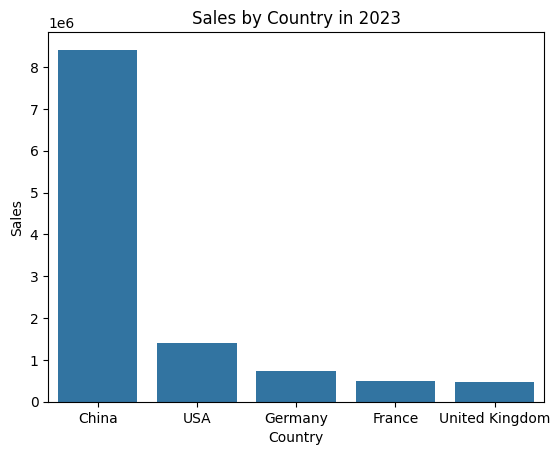

In [124]:
# 3. Who were the top 5 countries that sold EVs in 2023?
historical_sales_2023 = sort_by_historical_sales[sort_by_historical_sales.year == 2023]
country_sales = {}
for country in countries:
    country_sales[country] = 0
for index, row in historical_sales_2023.iterrows():
    if (row.region != "World" and row.region != "Europe" and row.region != "EU27"):
        country_sales[row.region] = country_sales[row.region] + row.value
result = sorted(country_sales.items(), key=lambda item: item[1], reverse=True)
sum_country_sales = pd.DataFrame(result,columns=["Country","Sales"])
top_5_countries = sum_country_sales.nlargest(5,"Sales")
seaborn.barplot(x=top_5_countries.Country,y=top_5_countries.Sales)
plt.title("Sales by Country in 2023")
plt.savefig("Visualizations/Question 3 Visualization.png")
plt.show()


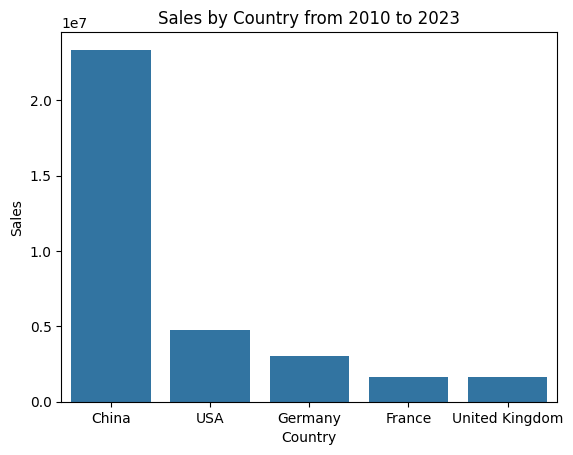

,Country,Sales
0,China,23358308.0
1,USA,4770934.2
2,Germany,3012826.0
3,France,1666650.0
4,United Kingdom,1659853.0


In [125]:
# 4. Which country has sold the most EVs in total?
country_sales = {}
for country in countries:
    country_sales[country] = 0
for index, row in sort_by_historical_sales.iterrows():
    if (row.region != "World" and row.region != "Europe" and row.region != "EU27"):
        country_sales[row.region] = country_sales[row.region] + row.value
result = sorted(country_sales.items(), key=lambda item: item[1], reverse=True)
sum_country_sales = pd.DataFrame(result,columns=["Country","Sales"])
top_5_countries = sum_country_sales.nlargest(5,"Sales")
seaborn.barplot(x=top_5_countries.Country,y=top_5_countries.Sales)
plt.title("Sales by Country from 2010 to 2023")
plt.savefig("Visualizations/Question 4 Visualization.png")
plt.show()
top_5_countries

C:\Users\kenny\AppData\Local\Temp\ipykernel_12192\3457131316.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sort_by_historical_stock = df[df.category == "Historical"][df.parameter == "EV stock"]


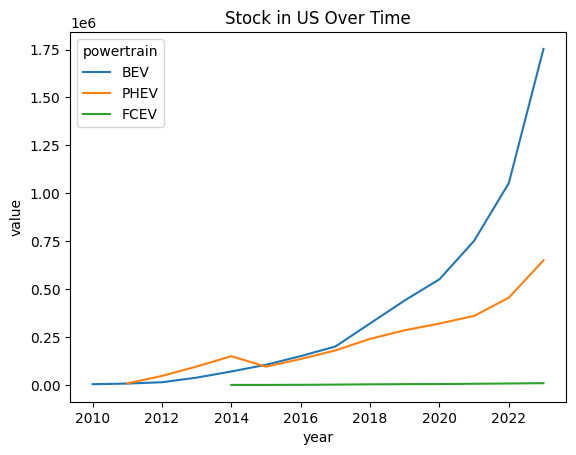

In [134]:
# 5. How has the stock changed in the US over time?
sort_by_historical_stock = df[df.category == "Historical"][df.parameter == "EV stock"]
stock_in_US = sort_by_historical_stock[sort_by_historical_stock.region == "USA"]
stock_in_US = stock_in_US[["powertrain", "year","value"]].copy()
seaborn.lineplot(data=stock_in_US,x="year",y="value",hue="powertrain",errorbar=None)
plt.title("Stock in US Over Time")
plt.savefig("Visualizations/Question 5 Visualization.png")
plt.show()

C:\Users\kenny\AppData\Local\Temp\ipykernel_12192\217073544.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sort_by_historical_stock = df[df.category == "Historical"][df.parameter == "EV stock"]


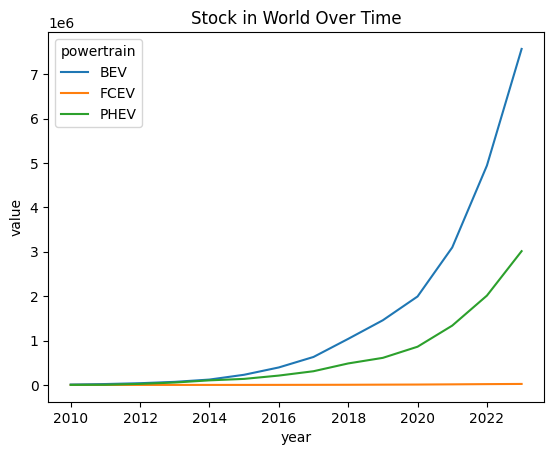

In [132]:
# 6. How has the stock changed in the World over time?
sort_by_historical_stock = df[df.category == "Historical"][df.parameter == "EV stock"]
stock_in_world = sort_by_historical_stock[sort_by_historical_stock.region == "World"]
stock_in_world = stock_in_world[["powertrain", "year","value"]].copy()
seaborn.lineplot(data=stock_in_world,x="year",y="value",hue="powertrain", errorbar=None)
plt.title("Stock in World Over Time")
plt.savefig("Visualizations/Question 6 Visualization.png")
plt.show()

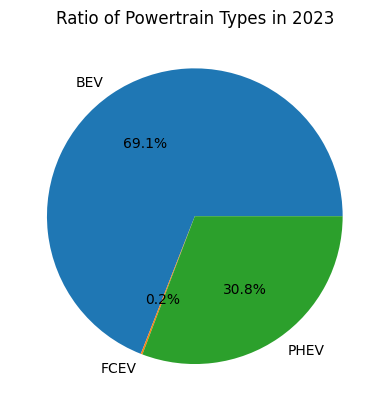

In [128]:
# 7. What is the ratio of types of EVs in 2023?
sort_by_historical_stock_2023 = sort_by_historical_stock[sort_by_historical_stock.year == 2023]
sum_stock_2023 = sort_by_historical_stock_2023.groupby("powertrain")["value"].sum()
plt.pie(sum_stock_2023,labels=sum_stock_2023.index, autopct="%1.1f%%")
plt.title("Ratio of Powertrain Types in 2023")
plt.savefig("Visualizations/Question 7 Visualization.png")
plt.show()

In [129]:
# 8. How has the ratio of EV types changed over time?

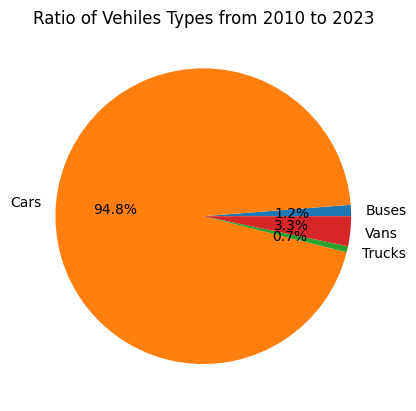

In [130]:
# 9. What is the ratio of electric cars, trucks, etc. sold?
sum_sales = sort_by_historical_sales.groupby("mode")["value"].sum()
plt.pie(sum_sales,labels=sum_sales.index, autopct="%1.1f%%")
plt.title("Ratio of Vehiles Types from 2010 to 2023")
plt.savefig("Visualizations/Question 9 Visualization.png")
plt.show()

In [131]:
# 10. How have the percentage of electric vehicles sold in 
#     the United States changed over time?
